<font size="6">Project 2:  House Prices (Regression) </font>


## Problem Statment

## Executive Summary

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Visualization](#Visualize-the-data)
- [Data Modling](#Model-the-data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Import all required libraries

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor


# Datasets Description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|SalePrice|int64|train|The property's sale price in dollars. This is the target variable that you're trying to predict.|  
|MSSubClass|Object|train/test|The building class| 
|MSZoning|object|train/test|The general zoning classification|
|LotFrontage|float64|train/test|Linear feet of street connected to property|
|LotArea|int64|train/test| Lot size in square feet|
|Street|object|train/test|Type of road access|
|Alley|object|train/test|Type of alley access|
|LotShape|object|train/test| General shape of property|
|LandContour|object|train/test|Flatness of the property|
|Utilities|object|train/test|Type of utilities available|
|LotConfig|object|train/test|Lot configuration|
|LandSlope|object|train/test|Type of alley access|
|LotShape|object|train/test| Slope of property|
|Neighborhood|object|train/test|Physical locations within Ames city limits|
|Condition1|object|train/test|Proximity to main road or railroad|
|Condition2|object|train/test|Proximity to main road or railroad (if a second is present)|
|BldgType|object|train/test|Type of dwelling|
|HouseStyle|object|train/test|Style of dwelling|
|OverallQual|int64|train/test|Overall material and finish quality)|
|OverallCond|object|train/test|OverallCond|
|YearBuilt|int64|train/test|Original construction date|
|BuildingAge|int64|train/test|Age of the building|
|RemodelAge|int64|train/test|number of years since last remodel|
|YearRemodAdd|int64|train/test|Remodel date|
|RoofStyle|object|train/test|Type of roof|
|RoofMatl|object|train/test|Roof material|
|Exterior1st|object|train/test|Exterior covering on house|
|Exterior2nd|object|train/test|Exterior covering on house (if more than one material)|
|MasVnrType|object|train/test|Masonry veneer type|
|MasVnrArea|int|train/test|Masonry veneer area in square feet|
|ExterQual|object|train/test|Exterior material quality|
|ExterCond|object|train/test|Present condition of the material on the exterior|
|Foundation|object|train/test|Type of foundation|
|BsmtQual|object|train/test|Height of the basement|
|BsmtCond|object|train/test|General condition of the basement|
|BsmtExposure|object|train/test|Walkout or garden level basement walls|
|BsmtFinType1|object|train/test|Quality of basement finished area|
|BsmtFinSF1|float64|train/test|Type 1 finished square feet|
|BsmtFinType2|object|train/test|Quality of second finished area (if present)|
|BsmtFinSF2|float64|train/test|Type 2 finished square feet|
|BsmtUnfSF|float64|train/test|Unfinished square feet of basement area|
|TotalBsmtSF|float64|train/test|Total square feet of basement area|
|Heating|object|train/test|Type of heating|
|HeatingQC|object|train/test|Heating quality and condition|
|CentralAir|object|train/test|Central air conditioning|
|Electrical|object|train/test|Electrical system|
|1stFlrSF|int64|train/test|First Floor square feet|
|2ndFlrSF|int64|train/test|Second floor square feet|
|LowQualFinSF|object|train/test|Low quality finished square feet (all floors)|
|GrLivArea|int64|train/test|Above grade (ground) living area square feet|
|BsmtFullBath|float64|train/test|Basement full bathrooms|
|BsmtHalfBath|float64|train/test|Basement half bathrooms|
|FullBath|int64|train/test|Full bathrooms above grade|
|HalfBath|int64|train/test|Half baths above grade|
|BedroomAbvGr|int64|train/test|Number of bedrooms above basement level|
|KitchenAbvGr|int64|train/test|Number of kitchens|
|KitchenQual|object|train/test|Kitchen quality|
|TotRmsAbvGrd|int64|train/test|Total rooms above grade (does not include bathrooms)|
|Functional|object|train/test|Home functionality rating|
|Fireplaces|int64|train/test|Number of fireplaces|
|FireplaceQu|object|train/test|Fireplace quality|
|GarageType|object|train/test|Garage location|
|GarageYrBlt|int|train/test|Year garage was built|
|GarageFinish|object|train/test|Interior finish of the garage|
|GarageCars|object|train/test|Size of garage in car capacity|
|GarageArea|object|train/test|Size of garage in square feet|
|GarageQual|object|train/test|Garage quality|
|GarageCond|object|train/test|Garage condition|
|PavedDrive|object|train/test|Paved driveway|
|WoodDeckSF|int|train/test|Wood deck area in square feet|
|OpenPorchSF|int|train/test|Open porch area in square feet|
|EnclosedPorch|object|train/test|Enclosed porch area in square feet|
|3SsnPorch|int|train/test|Three season porch area in square feet|
|ScreenPorch|int|train/test|Screen porch area in square feet|
|PoolArea|int|train/test|Pool area in square fee|
|PoolQC|object|train/test|Pool quality|
|Fence|object|train/test|Fence quality|
|MiscFeature|object|train/test|Miscellaneous feature not covered in other categories|
|MiscVal|int|train/test|Screen porch area in square feet|
|PoolArea|int|train/test|Pool area in square fee|
|PoolQC|object|train/test|Pool quality|
|Fence|object|train/test|Fence quality|
|MiscVal|int64|train/test|Value of miscellaneous feature|
|MoSold|int64|train/test|Month Sold|
|YrSold|int64|train/test|Year Sold|
|SaleType|object|train/test|Type of sale|
|SaleCondition|object|train/test|Condition of sale|

<font size="5">Data Import and Cleaning </font>


####  Read the Data House Prices

In [2]:
house_train = pd.read_csv('train.csv', sep=',')
house_test = pd.read_csv('test.csv', sep=',')


<font size="6" color="Blue"> EDA </font>

In [3]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape of training data.
house_train.shape

(1460, 81)

In [5]:
# The shape of testing data.
house_test.shape

(1459, 80)

In [6]:
# Merge the training and testing data to clean it.
house_df = pd.concat([house_train, house_test], join='inner', ignore_index=True)


In [7]:
# The shape of merge data.
house_df.shape

(2919, 80)

In [8]:
y = house_train.SalePrice # Set the target 
house_df.drop('Id', axis=1, inplace=True) # Drop Id column (Useless) 

In [9]:
house_df.head() # chack the data after droping.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
house_df.tail() # Check last 5 rows

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [11]:
house_df.shape # Check the shape after drop 'ID'

(2919, 79)

In [12]:
house_df.describe() # Statistical summary of numerical columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
pd.set_option('display.max_rows', 200) # Show the first 200 rows.

house_df.isna().sum().sort_values(ascending=False) # print all nulls values per columns ascending.


PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageQual        159
GarageYrBlt       159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Utilities           2
Functional          2
BsmtFullBath        2
BsmtFinSF2          1
BsmtFinSF1          1
Exterior2nd         1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior1st         1
SaleType            1
Electrical          1
KitchenQual         1
GarageArea          1
GarageCars          1
OverallQual         0
OverallCond         0
LotArea             0
Street              0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType  

In [14]:
# We drop the below features because we found the majority of their classes belong to one class (will be useless). 
house_df =house_df.drop(columns=['Alley', 'MSZoning', 'Street', 'LandContour', 'Utilities', 
                                       'LandSlope', 'Condition1', 'Condition2','3SsnPorch','Fence', 'SaleCondition',
                                       'PoolQC','MiscVal', 'ScreenPorch', 'PoolArea', 'MiscFeature', 'GarageCond',
                                       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
                                       'Functional', 'RoofMatl', 'BsmtCond', 'BsmtFinSF2', 'Heating'])

In [15]:
house_df.head() # Check the data after dropping.

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
0,60,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,548.0,TA,Y,0,61,0,2,2008,WD
1,20,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,...,2.0,460.0,TA,Y,298,0,0,5,2007,WD
2,60,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,...,2.0,608.0,TA,Y,0,42,0,9,2008,WD
3,70,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,...,3.0,642.0,TA,Y,0,35,272,2,2006,WD
4,60,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,...,3.0,836.0,TA,Y,192,84,0,12,2008,WD


In [16]:
house_df.shape #Check the shape of Data Frame.

(2919, 52)

In [17]:
house_df.dtypes.sort_values() # Check data type of each column.

MSSubClass         int64
1stFlrSF           int64
GrLivArea          int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
YearBuilt          int64
YearRemodAdd       int64
OverallQual        int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
LotArea            int64
MoSold             int64
OverallCond        int64
YrSold             int64
TotalBsmtSF      float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
BsmtFullBath     float64
BsmtUnfSF        float64
LotFrontage      float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinType2      object
LotShape          object
LotConfig         object
Neighborhood      object
PavedDrive        object
GarageQual        object
BldgType          object
HouseStyle        object
GarageFinish      object
RoofStyle         object
GarageType        object
Exterior1st       object
Exterior2nd       object


<font size="6" color = "blue"> Data cleaning </font>

In [18]:
house_df['GarageYrBlt'].fillna('There is no Garage',inplace=True) # Fill the null with there is no Garage. 
house_df['GarageYrBlt'].astype(object) # Convert float into object

0                     2003
1                     1976
2                     2001
3                     1998
4                     2000
               ...        
2914    There is no Garage
2915                  1970
2916                  1960
2917    There is no Garage
2918                  1993
Name: GarageYrBlt, Length: 2919, dtype: object

In [19]:
house_df['GarageYrBlt'].tail(4)

2915                  1970
2916                  1960
2917    There is no Garage
2918                  1993
Name: GarageYrBlt, dtype: object

In [20]:
house_df.MSSubClass = house_df.MSSubClass.astype(object)# convert to object because each number represents a category.

In [21]:
# We fill below nulls because all nulls mean (There is no Basement)
house_df['MasVnrType']=house_df['MasVnrType'].fillna('No Basement')
house_df['BsmtExposure']=house_df['BsmtExposure'].fillna('No Basement')
house_df['BsmtFinType1']=house_df['BsmtFinType1'].fillna('No Basement')
house_df['BsmtFinType2']=house_df['BsmtFinType2'].fillna('No Basement')
house_df['MasVnrArea']=house_df['MasVnrArea'].fillna(0) 
house_df['BsmtQual']=house_df['BsmtQual'].fillna('None')

In [22]:
house_df['GarageQual'].unique() # Check the unique values.

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [23]:
house_df['GarageQual'].isnull().sum() # Number of nulls values.

159

In [24]:
house_df['GarageType'].unique() #null here = no garage 

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [25]:
# We fill below nulls because all nulls mean (There is no Garage)

house_df['GarageType']=house_df['GarageType'].fillna("No Garage")
house_df['GarageQual']=house_df['GarageQual'].fillna('No Garage')
house_df['GarageFinish']=house_df['GarageFinish'].fillna('No Garage')

In [26]:
house_df['FireplaceQu'].unique()#null here = No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [27]:
house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna("No Fire Place")  # Fill nulls with "No Fire Please"

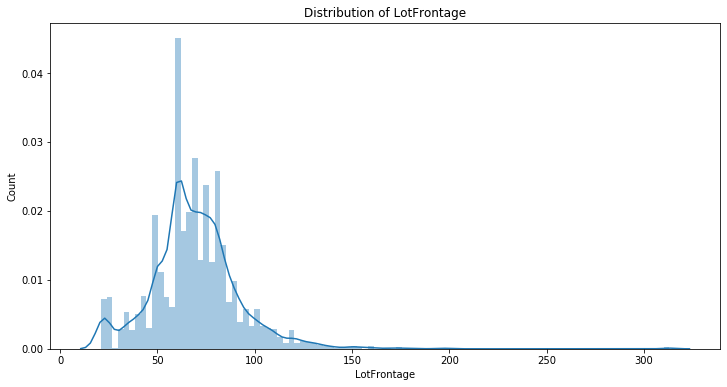

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(house_df.LotFrontage.dropna(), bins=100)
plt.title('Distribution of LotFrontage')
plt.ylabel('Count');

In [29]:
house_df.LotFrontage.isna().sum() # number of nulls

486

In [30]:
# We fill the missing values of LotFrontage by the median after we remove the outliers
house_df.LotFrontage.fillna(np.median(house_df.LotFrontage.dropna()), inplace=True)

In [31]:
house_df.iloc[1460:,:]

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType
1460,20,80.0,11622,Reg,Inside,NAmes,1Fam,1Story,5,6,...,1.0,730.0,TA,Y,140,0,0,6,2010,WD
1461,20,81.0,14267,IR1,Corner,NAmes,1Fam,1Story,6,6,...,1.0,312.0,TA,Y,393,36,0,6,2010,WD
1462,60,74.0,13830,IR1,Inside,Gilbert,1Fam,2Story,5,5,...,2.0,482.0,TA,Y,212,34,0,3,2010,WD
1463,60,78.0,9978,IR1,Inside,Gilbert,1Fam,2Story,6,6,...,2.0,470.0,TA,Y,360,36,0,6,2010,WD
1464,120,43.0,5005,IR1,Inside,StoneBr,TwnhsE,1Story,8,5,...,2.0,506.0,TA,Y,0,82,0,1,2010,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,Reg,Inside,MeadowV,Twnhs,2Story,4,7,...,0.0,0.0,No Garage,Y,0,0,0,6,2006,WD
2915,160,21.0,1894,Reg,Inside,MeadowV,TwnhsE,2Story,4,5,...,1.0,286.0,TA,Y,0,24,0,4,2006,WD
2916,20,160.0,20000,Reg,Inside,Mitchel,1Fam,1Story,5,7,...,2.0,576.0,TA,Y,474,0,0,9,2006,WD
2917,85,62.0,10441,Reg,Inside,Mitchel,1Fam,SFoyer,5,5,...,0.0,0.0,No Garage,Y,80,32,0,7,2006,WD


In [32]:
house_df.isna().sum().sort_values(ascending=False)

BsmtFullBath     2
SaleType         1
GarageCars       1
Exterior1st      1
Exterior2nd      1
BsmtFinSF1       1
TotalBsmtSF      1
KitchenQual      1
BsmtUnfSF        1
GarageArea       1
YearBuilt        0
ExterCond        0
ExterQual        0
MasVnrArea       0
MasVnrType       0
EnclosedPorch    0
MoSold           0
RoofStyle        0
YearRemodAdd     0
OverallCond      0
BsmtQual         0
OverallQual      0
HouseStyle       0
BldgType         0
Neighborhood     0
LotConfig        0
LotShape         0
LotArea          0
LotFrontage      0
Foundation       0
BsmtExposure     0
GarageFinish     0
FullBath         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
TotRmsAbvGrd     0
GarageQual       0
BedroomAbvGr     0
HalfBath         0
PavedDrive       0
BsmtFinType1     0
GrLivArea        0
1stFlrSF         0
CentralAir       0
HeatingQC        0
WoodDeckSF       0
YrSold           0
BsmtFinType2     0
OpenPorchSF      0
MSSubClass       0
dtype: int64

In [33]:
na_columns = ['BsmtFullBath', 'SaleType', 'GarageCars', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'TotalBsmtSF', 
              'KitchenQual', 'BsmtUnfSF', 'GarageArea']
def fill_na(list_of_columns):
    '''
    This function is for fill na values with median if the datatype is int or float and mode if datatype is object.
    '''
    for i in na_columns:
        if house_df[i].dtype == 'float64':
            house_df[i] = house_df[i].fillna(house_df[i].median())

        elif house_df[i].dtype == 'object':
            house_df[i] = house_df[i].fillna(house_df[i].mode()[0])

        elif house_df[i].dtype == 'int64':
            house_df[i] = house_df[i].fillna(house_df[i].median())

In [34]:
fill_na(na_columns)

In [35]:
house_df_ = pd.get_dummies(house_df, drop_first=True)

In [36]:
house_df_.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,...,0,1,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,0,1,0,0,0,0,0,0,0,1


In [37]:
X = house_df_.iloc[0:1460,:]
X['SalePrice'] = y

In [38]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,1,0,0,0,0,0,0,0,1,175000
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,1,0,0,0,0,0,0,0,1,210000
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,1,0,0,0,0,0,0,0,1,266500
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,1,0,0,0,0,0,0,0,1,142125
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,1,0,0,0,0,0,0,0,1,147500


In [39]:
X.shape

(1460, 293)

In [40]:
X.tail()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
1455,62.0,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,1,0,0,0,0,0,0,0,1,175000
1456,85.0,13175,6,6,1978,1988,119.0,790.0,589.0,1542.0,...,1,0,0,0,0,0,0,0,1,210000
1457,66.0,9042,7,9,1941,2006,0.0,275.0,877.0,1152.0,...,1,0,0,0,0,0,0,0,1,266500
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,1,0,0,0,0,0,0,0,1,142125
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,1,0,0,0,0,0,0,0,1,147500


In [41]:
h_test = house_df_.iloc[1460:,:]

In [42]:
h_test.shape

(1459, 292)

In [43]:
h_test.isna().sum().sort_values(ascending=False)

SaleType_WD            0
Exterior2nd_MetalSd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
                      ..
GarageYrBlt_1933.0     0
GarageYrBlt_1934.0     0
GarageYrBlt_1935.0     0
GarageYrBlt_1936.0     0
LotFrontage            0
Length: 292, dtype: int64

In [44]:
X.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,...,1,0,0,0,0,0,0,0,1,208500
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,...,1,0,0,0,0,0,0,0,1,181500


In [45]:
X.tail(2)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
1458,68.0,9717,5,6,1950,1996,0.0,49.0,0.0,1078.0,...,1,0,0,0,0,0,0,0,1,142125
1459,75.0,9937,5,6,1965,1965,0.0,830.0,136.0,1256.0,...,1,0,0,0,0,0,0,0,1,147500


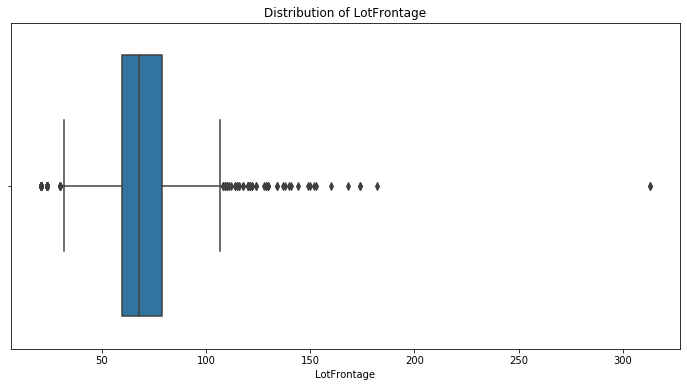

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(X.LotFrontage)
plt.title('Distribution of LotFrontage');

In [47]:
X[X['LotFrontage'] > 200] # Check the outliers

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
934,313.0,27650,7,7,1960,2007,0.0,425.0,160.0,585.0,...,1,0,0,0,0,0,0,0,1,242000
1298,313.0,63887,10,5,2008,2008,796.0,5644.0,466.0,6110.0,...,1,0,0,0,0,0,1,0,0,160000


In [48]:
## We drop the outliers which are over 300 to replace the nulls with median
# X.drop(X[X['LotFrontage'] > 300].index, axis=0, inplace=True)

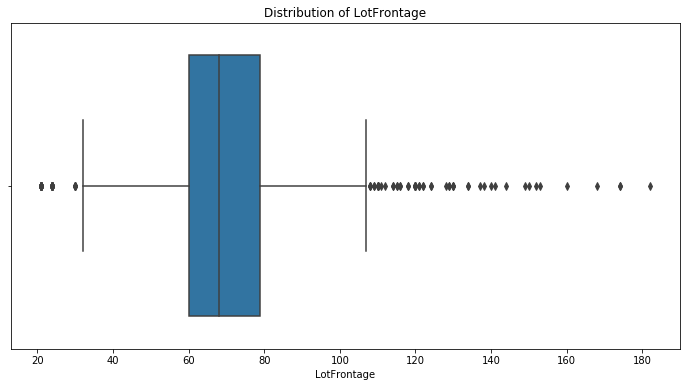

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(X.LotFrontage.dropna())
plt.title('Distribution of LotFrontage');

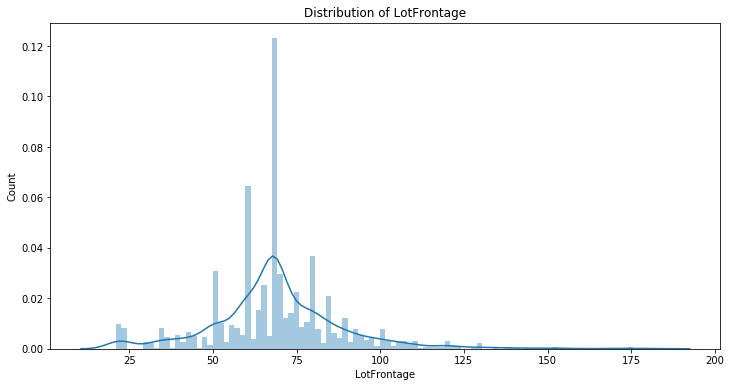

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(X.LotFrontage, bins=100)
plt.title('Distribution of LotFrontage')
plt.ylabel('Count');

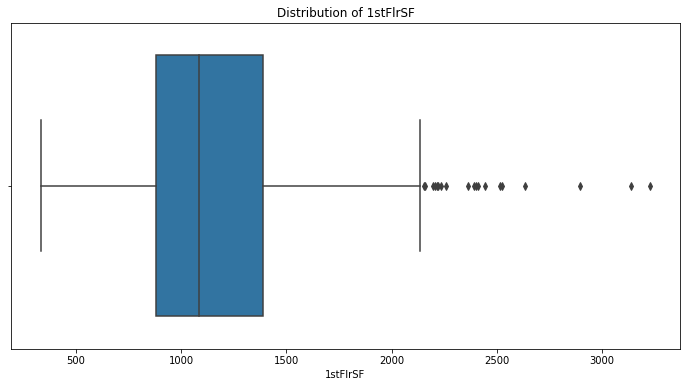

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(X['1stFlrSF'])
plt.title('Distribution of 1stFlrSF');

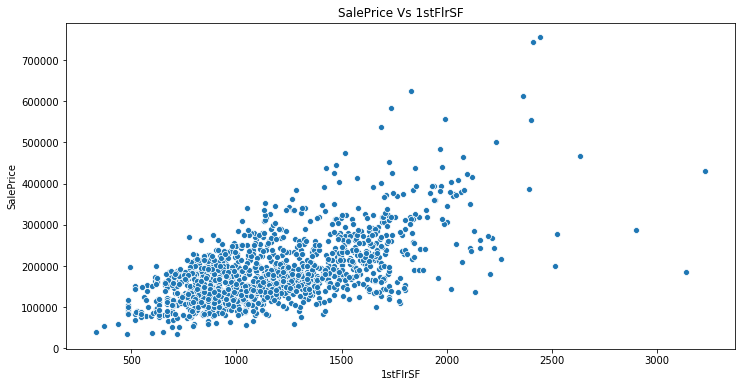

In [52]:
plt.figure(figsize=(12,6))
plt.title('SalePrice Vs 1stFlrSF');
sns.scatterplot(x = X['1stFlrSF'], y = y); #outlier only one in row 

In [53]:
X[(X['1stFlrSF']>3000)] # Rows that we think it is an outlier

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
496,68.0,12692,8,5,1992,1993,0.0,1231.0,1969.0,3200.0,...,1,0,0,0,0,0,0,0,1,430000
523,130.0,40094,10,5,2007,2008,762.0,2260.0,878.0,3138.0,...,1,0,0,0,0,0,1,0,0,184750


In [54]:
## We drop the outlier which is over 3000 
# X['1stFlrSF'].drop(X[X['1stFlrSF'] > 3000].index, axis=0 , inplace=True)

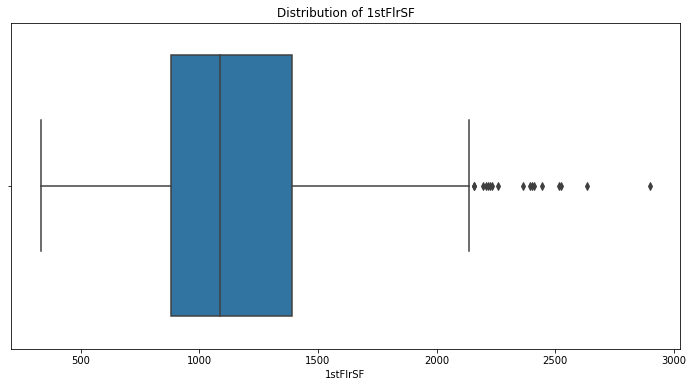

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(X['1stFlrSF'])
plt.title('Distribution of 1stFlrSF');

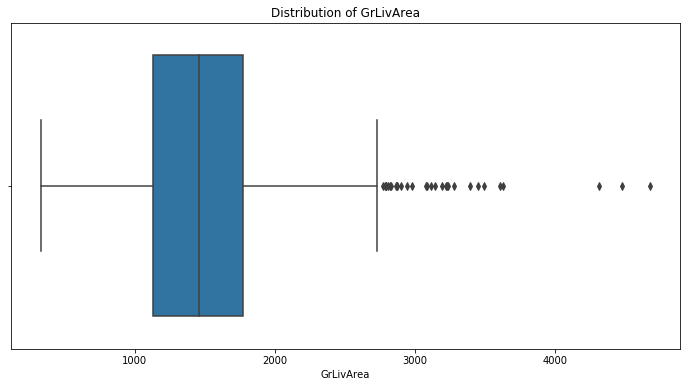

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(X['GrLivArea'])
plt.title('Distribution of GrLivArea'); #outlier only in 4 row

In [57]:
X[X['GrLivArea']>4000] # Rows that we think it is an outlier

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SalePrice
523,130.0,40094,10,5,2007,2008,762.0,2260.0,878.0,3138.0,...,1,0,0,0,0,0,1,0,0,184750
691,104.0,21535,10,6,1994,1995,1170.0,1455.0,989.0,2444.0,...,1,0,0,0,0,0,0,0,1,755000
1182,160.0,15623,10,5,1996,1996,0.0,2096.0,300.0,2396.0,...,1,0,0,0,0,0,0,0,1,745000


In [58]:
# X['GrLivArea'].drop(X[X['GrLivArea']>4000].index, axis=0, inplace=True)


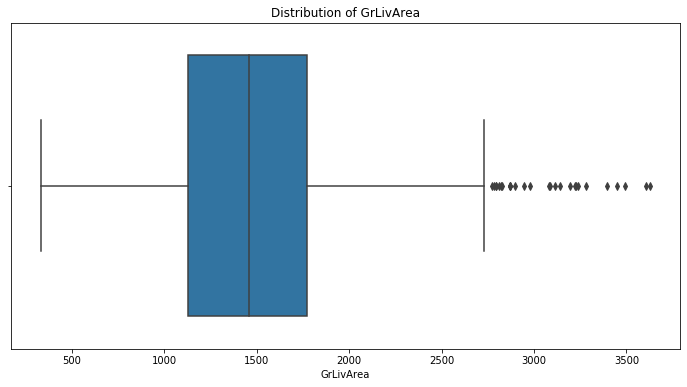

In [59]:
plt.figure(figsize=(12,6))
sns.boxplot(X['GrLivArea'])
plt.title('Distribution of GrLivArea'); #outlier only in 4 row

In [60]:
X.shape

(1458, 293)

<font size="4">Visualize the data</font>

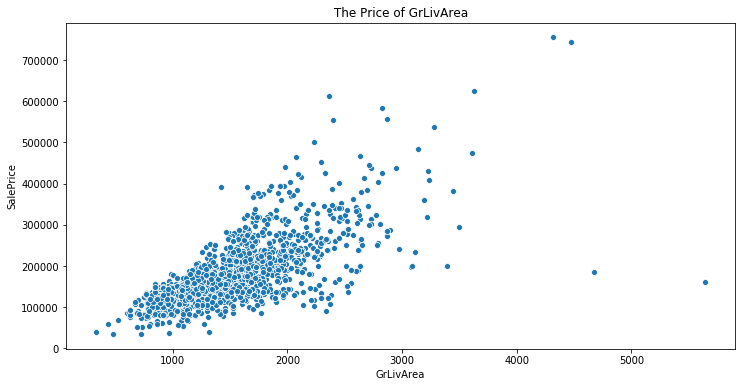

In [61]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = house_train.GrLivArea, y = house_train.SalePrice);
plt.title(" The Price of GrLivArea ");

### There is a strong dependence of sale price on the total living area. 

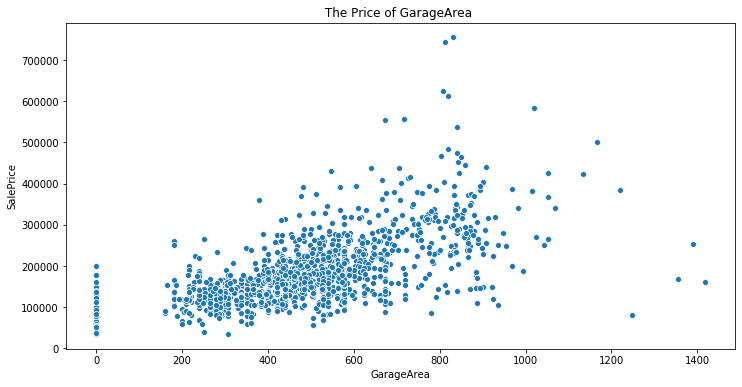

In [62]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = house_train.GarageArea, y = house_train.SalePrice, palette= 'Spectral');
plt.title(" The Price of GarageArea  ");

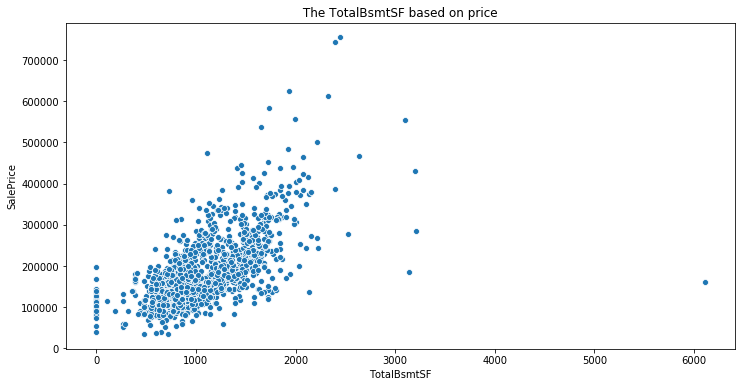

In [63]:
plt.figure(figsize = (12, 6))
sns.scatterplot(y = house_train.SalePrice , x = house_train.TotalBsmtSF,  palette= 'YlOrRd');
plt.title(" The TotalBsmtSF based on price ");

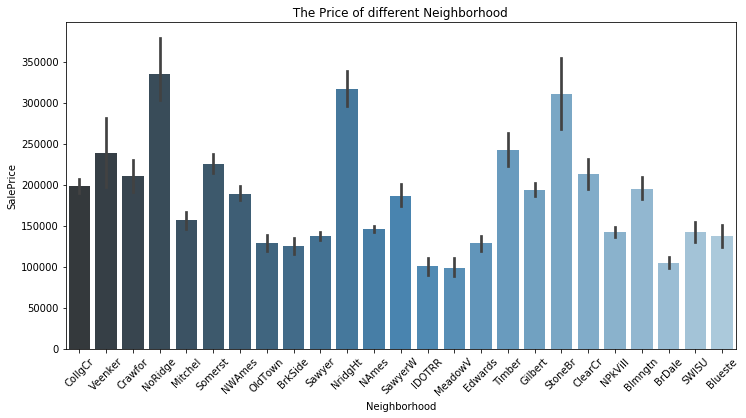

In [64]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice',  data = house_train , palette="Blues_d")
xt = plt.xticks(rotation=45)
plt.title(" The Price of different Neighborhood ");

### variation in price between neighbourhoods.

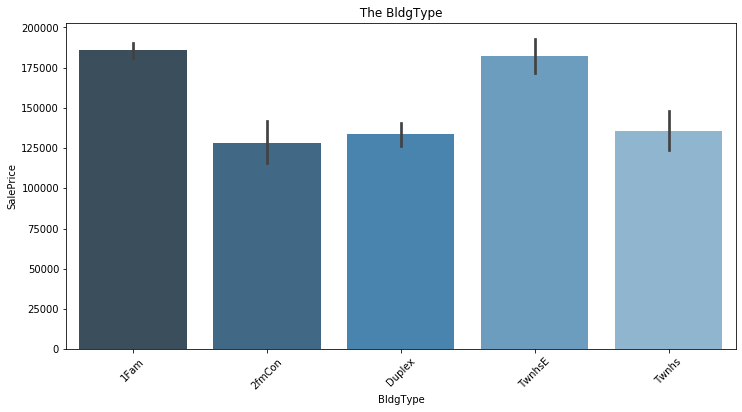

In [65]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'BldgType', y = 'SalePrice',  data = house_train , palette="Blues_d")
xt = plt.xticks(rotation=45)
plt.title(" The BldgType ");

### Single-family Detached &Townhouse End Unit More expensive than other 

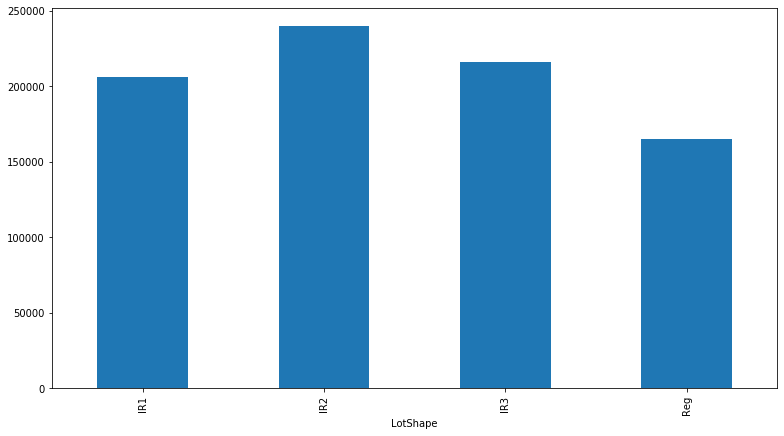

In [66]:
plt.figure(figsize=(13,7))
house_train.groupby('LotShape')['SalePrice'].mean().plot(kind='bar');

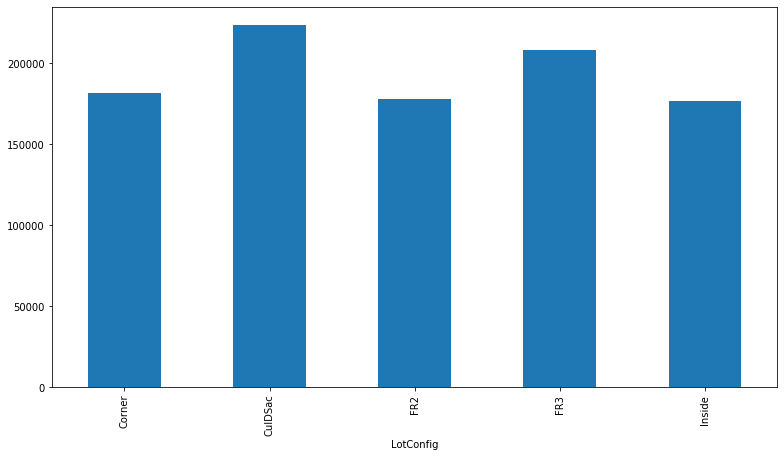

In [67]:
plt.figure(figsize=(13,7))
house_train.groupby('LotConfig')['SalePrice'].mean().plot(kind='bar')

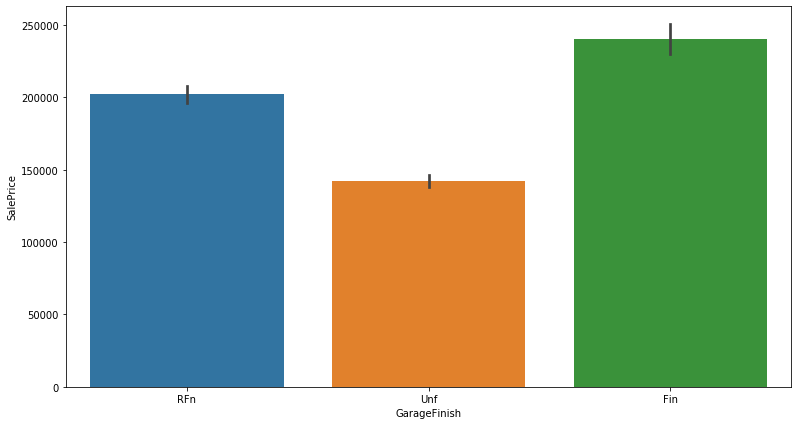

In [68]:
plt.figure(figsize=(13,7))
sns.barplot(house_train.GarageFinish ,house_train.SalePrice)

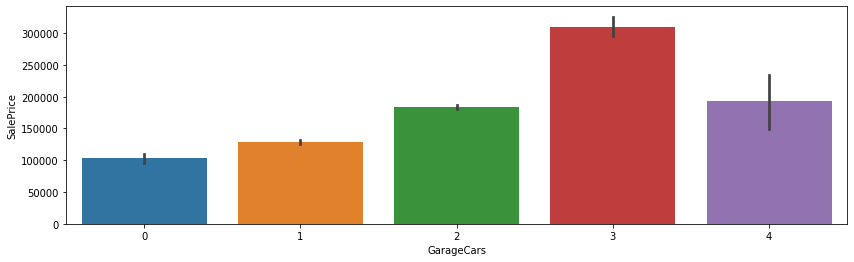

In [69]:
plt.figure(figsize=(14,4))
sns.barplot(house_train.GarageCars ,house_train.SalePrice)

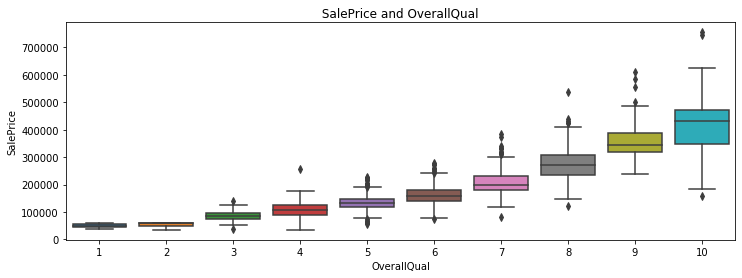

In [70]:
plt.figure(figsize = (12, 4))
sns.boxplot(x='OverallQual', y='SalePrice', data=house_train[['SalePrice', 'OverallQual']]);
plt.title(" SalePrice and OverallQual ");

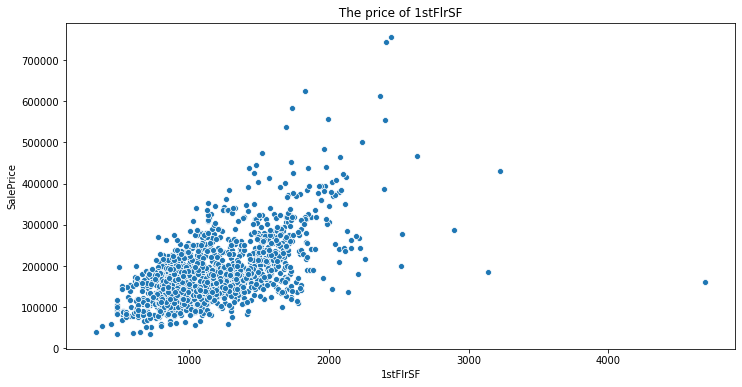

In [71]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = house_train['1stFlrSF'], y = house_train.SalePrice, palette= 'Spectral');
plt.title(" The price of 1stFlrSF ");

In [72]:
# Check with owner 

house_train.SalePrice[house_train['RoofStyle'] == 'Gambrel'].median()

139000.0

In [73]:
house_train.SalePrice[house_train['RoofStyle'] == 'Hip'].median()

176500.0

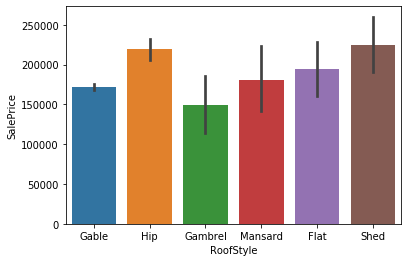

In [74]:
sns.barplot(house_train.RoofStyle ,house_train.SalePrice)

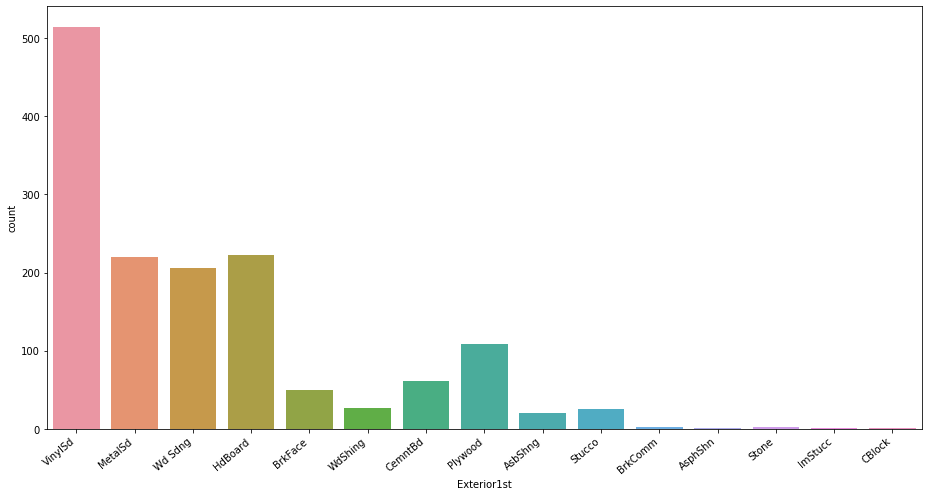

In [75]:
plt.figure(figsize=(13,7))
ax = sns.countplot(house_train.Exterior1st)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

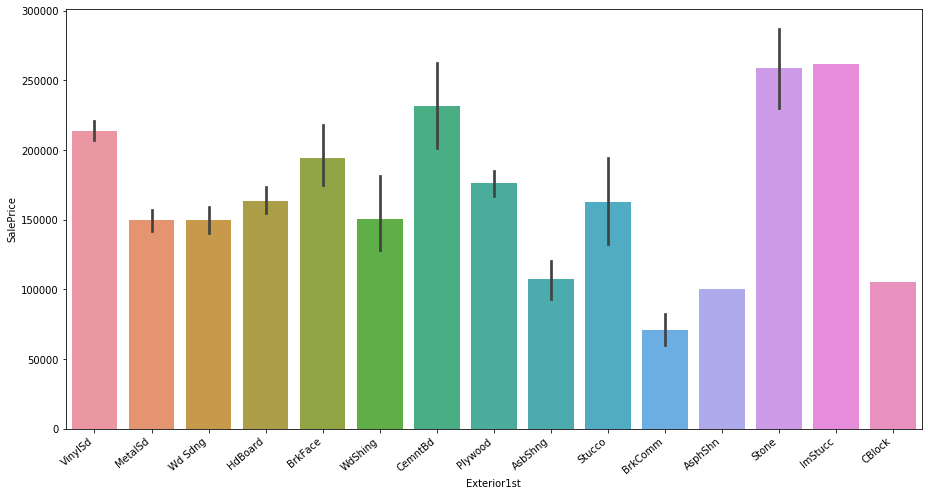

In [76]:
plt.figure(figsize=(13,7))
ax = sns.barplot(house_train.Exterior1st ,house_train.SalePrice)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [114]:
Months = {1 : 'JAn', 2: 'Feb', 3: 'Mar', 4:'April', 5: 'May', 6: 'Jun', 7: 'July', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 
          11:'Nov', 12:'Dec'}

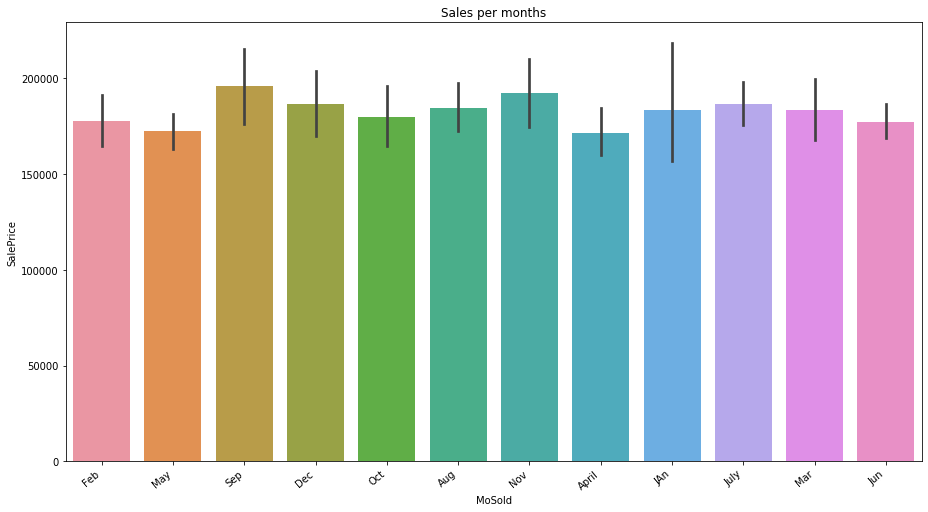

In [122]:
plt.figure(figsize=(13,7))
ax = sns.barplot(house_train.MoSold.map(Months), house_train.SalePrice)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Sales per months')
plt.show()


## correlation

In [77]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(25,10))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    ax.title.set_text('Features Correlation')
    b,t=plt.ylim()
    b  +=.5
    t -=.5
    plt.ylim(b,t)


    plt.show()

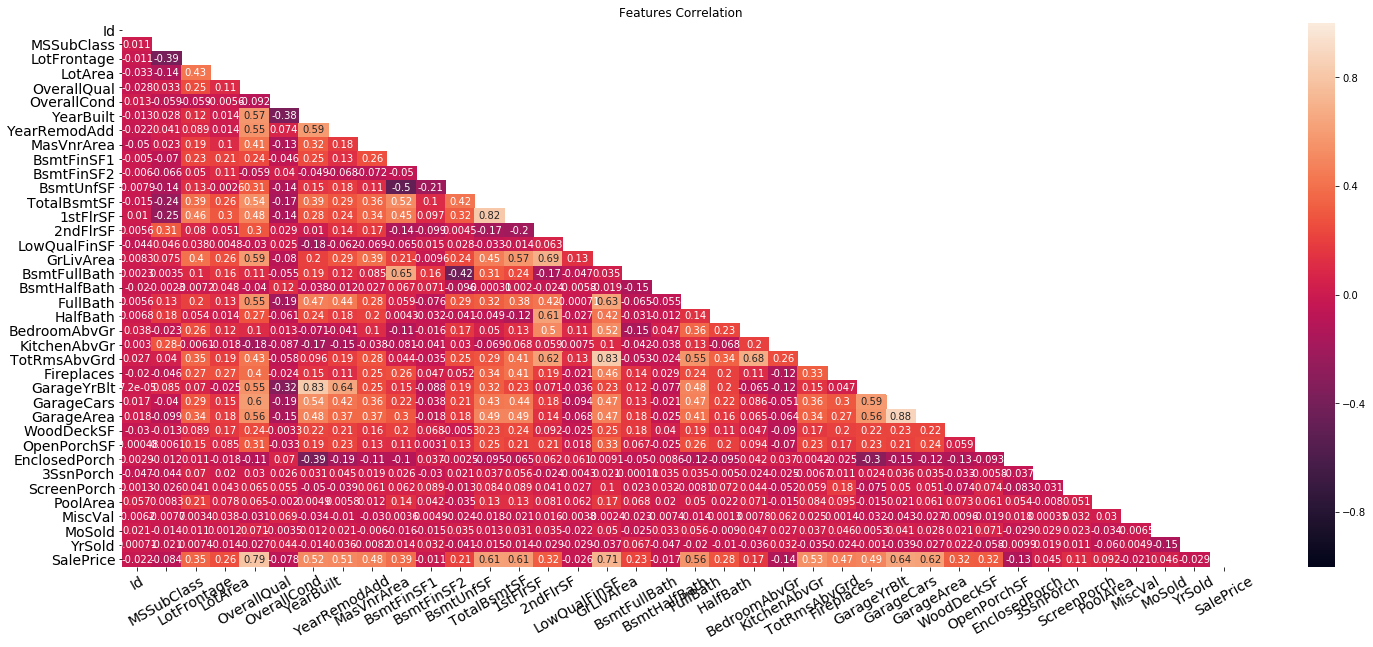

In [78]:
correlation_heat_map(house_train)

In [79]:
y = X.SalePrice

In [80]:
X.drop('SalePrice', axis=1, inplace=True)

<font size="5">Modeling </font>


In [81]:
# Linear Regression with whole data as training
lr = LinearRegression(n_jobs=-1)
lr.fit(X,y)
print('Linear Regression score for whole data as training:', lr.score(X,y))

Linear Regression score for whole data as training: 0.9168874644447733


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,test_size=.2, random_state=42)

In [83]:
# Linear Regression with train test split
lr_tt = LinearRegression()
lr_tt.fit(X_train, y_train)
print('Linear Regression score with train_test_split')
print('train score', lr_tt.score(X_train, y_train))
print('test score', lr_tt.score(X_test, y_test))

Linear Regression score with train_test_split
train score 0.917410974658143
test score 0.8835290500182856


In [85]:
# Cross validation with 3 folds
print('cross-validation score:',np.mean(cross_val_score(lr, X, y, cv=3)))

cross-validation score: 0.8383609329199091


In [90]:
ss = StandardScaler() # Scale our data
ss.fit(X_train)

X_train_s = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)



In [91]:
# Linear Regression after scaling
lrs = LinearRegression()
lrs.fit(X_train_s, y_train)
print('Training score after scaling',lrs.score(X_train_s, y_train))
print('Testing score after scaling',lrs.score(X_test_s, y_test))

Training score after scaling 0.917410259193792
Testing score after scaling -1.2025213847922306e+22


In [92]:
# Lasso 
ls = Lasso()
ls.fit(X_train_s, y_train)
print('Lasso training score:', ls.score(X_train_s, y_train))
print('Lasso testing score:',ls.score(X_test_s, y_test))

Lasso training score: 0.9174103053141873
Lasso testing score: 0.883723732324922


In [93]:
# Grid Search to determine the best alpha of lasso
alpha = np.arange(0.001, 1000, 0.5)
grs = GridSearchCV(ls,  {'alpha': alpha}, n_jobs=-1)
grs.fit(X_train_s, y_train)

print('Best score', grs.best_score_)
print('Best alpha',grs.best_params_)

Best score 0.8585571407099636
Best alpha {'alpha': 778.001}


In [94]:
# Grid Search to determine the best alpha of lassocv

lasso_alphas = np.arange(1,200, 0.05)
lscv = LassoCV(cv=3,alphas=lasso_alphas, n_jobs=-1)
lscv.fit(X_train_s, y_train)

print('LassoCV training score',lscv.score(X_train_s, y_train))
print('LassoCV testing score',lscv.score(X_test_s, y_test))

LassoCV training score 0.9122987969690696
LassoCV testing score 0.8942953661110642


In [95]:
# Random Forest Regression with random hyperparameter
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)

In [96]:
scaler = StandardScaler()

scaler.fit(X)

Xs = pd.DataFrame(ss.transform(X), columns=X.columns)
X_target_s = pd.DataFrame(ss.transform(h_test), columns=h_test.columns)

rfr.fit(Xs, y)
print('Random Forest Regressor score:', rfr.score(Xs, y))

Random Forest Regressor score: 0.9755067242431731


In [97]:
n_estimatorss = np.arange(1,200, 10)
max_depthh = np.arange(1,30,3)
grd = GridSearchCV(rfr, {'n_estimators' :n_estimatorss, 'max_depth' : max_depthh }, n_jobs=-1)

grd.fit(Xs, y)
print('The best parameter is:', grd.best_params_)
print('The best score is: ', grd.best_score_)

The best parameter is: {'max_depth': 25, 'n_estimators': 111}
The best score is:  0.861235938484917


In [98]:
submission = pd.DataFrame()
temp_list = []
for i in range(1461, 2920):
    temp_list.append(i)


In [99]:
submission['Id'] = temp_list
submission.head()
submission['SalePrice'] = rfr.predict(X_target_s)

submission.set_index('Id', inplace=True)


In [100]:
rfr.predict(X_target_s)

array([127579.77681137, 153440.25276982, 175488.73386362, ...,
       153749.91010151, 118462.39924213, 219914.5765696 ])

In [101]:
submission.to_csv('submission.csv')

In [102]:
lscv1 = LassoCV()
lscv1.fit(Xs, y)

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [103]:
lscv1.score(Xs, y)

0.9009488455802684

In [104]:
alphaa = np.arange(1, 100, 1)
grd = GridSearchCV(lscv1, {'n_alphas': alphaa}, n_jobs=-1)
grd.fit(Xs, y)

print('Best Score is:',grd.best_score_)
print('Best parameter is:', grd.best_params_)

Best Score is: 0.872143266716743
Best parameter is: {'n_alphas': 4}


In [105]:
# del lasso_submission

NameError: name 'lasso_submission' is not defined

In [106]:
lasso_submission = pd.DataFrame()
lasso_submission['Id'] = temp_list 

In [107]:
lasso_submission['SalePrice'] = grd.predict(X_target_s)

In [108]:
lasso_submission.set_index('Id', inplace=True)

In [109]:
lasso_submission.to_csv('Lasso_submission.csv')

# Conclusions